In [1]:
# %matplotlib widget
import pandas as pd
import numpy as np
import pw_helpers
import matplotlib.pyplot as plt

# Introduction to pandas

The observations have been made by a GNSS receiver placed on the roof of a building at CNES (Toulouse), and recorded in `RINEX` format (Receiver Independent Exchange format). The RINEX file has been post-processed by `PRX` (processed RINEX), a program developped by GNSS enthusiasts, to compute all the parameters required to compute a GNSS position. This produced a file, saved in `CSV` format (comma-separated values).

We are going to import this file in a data structure used by the `Pandas` package: the `pandas.DataFrame`.

In [2]:
# load data
data_prx = pw_helpers.prx_csv_to_pandas(
    "./data/TLSE00FRA_R_20230010100_10S_01S_MO.csv",
    # "./data/TLSE00FRA_R_20220010000_01D_30S_MO.csv"
)

# show the first 5 lines
data_prx.head()

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m
0,2023-01-01 01:00:00,C,5,2I,3.990233e+07,-19.172,3.990233e+07,NaN,35.6,"[21806994.53795092, 36070439.48847678, -208299...","[0.96315908, -4.77085589, -99.57796611]",75937.584534,0.000464,-39.968915,-0.375844,0.000000,4.039967,10.571269,"[4627852.352, 119640.5351, 4372994.4909]"
1,2023-01-01 01:00:00,C,5,6I,3.990232e+07,NaN,3.990232e+07,NaN,37.4,"[21806994.53795092, 36070439.48847678, -208299...","[0.96315908, -4.77085589, -99.57796611]",75937.584534,0.000464,-39.968915,-0.375844,0.000000,6.118480,10.571269,"[4627852.352, 119640.5351, 4372994.4909]"
2,2023-01-01 01:00:00,C,5,7I,3.990232e+07,NaN,3.990232e+07,NaN,39.6,"[21806994.53795092, 36070439.48847678, -208299...","[0.96315908, -4.77085589, -99.57796611]",75937.584534,0.000464,-39.968915,-0.375844,-2.788070,6.756517,10.571269,"[4627852.352, 119640.5351, 4372994.4909]"
3,2023-01-01 01:00:00,C,6,2I,4.000044e+07,1162.184,4.000044e+07,NaN,35.4,"[-511620.65870109, 34136312.02260914, 24903968...","[284.82316595, -1247.61084045, 1702.83076064]",62851.435192,-0.001442,-38.441219,2.183579,2.578215,3.704125,8.299848,"[4627852.352, 119640.5351, 4372994.4909]"
4,2023-01-01 01:00:00,C,6,6I,4.000043e+07,NaN,4.000043e+07,NaN,36.4,"[-511620.65870109, 34136312.02260914, 24903968...","[284.82316595, -1247.61084045, 1702.83076064]",62851.435192,-0.001442,-38.441219,2.183579,0.000000,5.609851,8.299848,"[4627852.352, 119640.5351, 4372994.4909]"


The resulting `pd.DataFrame` contains a data table.  
The `pd.DataFrame` has an index (the first column) which is here just an integer.  
Each rows contains a single GNSS observation and all the associated data. You can see the list of all the available parameters as column headers.

In [3]:
data_prx.columns

Index(['time_of_reception_in_receiver_time', 'constellation', 'prn',
       'observation_code', 'code_observation_m', 'doppler_observation_hz',
       'carrier_observation_m', 'lli', 'cn0_dbhz', 'satellite_position_m',
       'satellite_velocity_mps', 'satellite_clock_bias_m',
       'satellite_clock_bias_drift_mps', 'sagnac_effect_m',
       'relativistic_clock_effect_m', 'group_delay_m', 'iono_delay_m',
       'tropo_delay_m', 'approximate_antenna_position_m'],
      dtype='object')


We are now going to learn how to use `pandas` feature in order to
- access the data,
- filter,
- plot

# Accessing data
To access a row, you can use the `.iloc[index_val]` method.  
> ***Instruction:*** *Try to access:*
> - *the first line of `data_prx`*
> - *the first two lines of `data_prx`*

Note: remember that Python uses a zero indexing convention.

In [4]:
# Complete this code
# first_line =
first_line = data_prx.iloc[0]

print(
    "Sucess!!\n\n", first_line
) if first_line.constellation == "C" and first_line.prn == 5 else print("Try again...")

Sucess!!

 time_of_reception_in_receiver_time                                  2023-01-01 01:00:00
constellation                                                                         C
prn                                                                                   5
observation_code                                                                     2I
code_observation_m                                                         39902331.273
doppler_observation_hz                                                          -19.172
carrier_observation_m                                                   39902329.096107
lli                                                                                 NaN
cn0_dbhz                                                                           35.6
satellite_position_m                  [21806994.53795092, 36070439.48847678, -208299...
satellite_velocity_mps                          [0.96315908, -4.77085589, -99.57796611]
satellite_clock_bias_

To access a particular column, you can call it either
- with brackets: `data_prx["code_observation_m"]`
- or with a dot: `data_prx.code_observation_m`

This will return another `pandas` structure, called the `pandas.Series`, sharing the same index.
A `pandas.Series` is just a `DataFrame` with a single column.

> ***Instruction:*** *Using `.head()`, display the 5 first values of the `prn` column of `data_prx`.*

In [5]:
# Complete this code
prn_series = data_prx.prn
prn_series = data_prx["prn"]

prn_series.head()

0    5
1    5
2    5
3    6
4    6
Name: prn, dtype: int64

You can also access several columns by putting a `list` of column names between brackets.
This will return another `DataFrame` with several columns.

> ***Instruction:*** *Using `.head()`, display the 5 first values of the `prn` and `constellation` columns of data_prx*

In [6]:
data_prx[["prn", "constellation"]].head()

,prn,constellation
0,5,C
1,5,C
2,5,C
3,6,C
4,6,C


# Conditional filtering
`pandas` allow to quickly filter the rows thanks to the `.loc[condition]` method, where `condition` is a `Series` of boolean.

For example, you can keep only the observations with high C/No thanks to the following line:  
`data_high_snr = data_prx.loc[ data_prx.cn0_dbhz > 40 ]`

> ***Instruction:*** *Try this command and display the number of observations before and after filtering.*

In [7]:
data_high_snr = data_prx.loc[data_prx.cn0_dbhz > 45]

print(f"There are {len(data_prx)} observations in the original dataset")
print(f"There are {len(data_high_snr)} observations with a C/No above 45 dbHz")

There are 1896 observations in the original dataset
There are 868 observations with a C/No above 45 dbHz


You can also check if one column is within a list of values with the function `Series.isin(list)`.

> ***Instruction:*** *Display the number of observations from the constellations GPS (`constellation=="G"`) and Galileo (`constellation=="E"`)

In [8]:
data_gps = data_prx.loc[data_prx.constellation == "G"]
data_gal = data_prx.loc[data_prx.constellation == "E"]
data_gps_gal = data_prx.loc[data_prx.constellation.isin(["G", "E"])]

print(
    f"There are {len(data_gps)} GPS observations and {len(data_gal)} GAL observations."
)
print(f"This sums up to {len(data_gps_gal)} GPS and GAL observations.")

There are 360 GPS observations and 450 GAL observations.
This sums up to 810 GPS and GAL observations.


You can use several conditions when filtering with `.loc[(condition_1) & (condition_2)]`

> ***Instruction:*** *Extract the observations containing only GPS and L1 C/Q observations (corresponding `observation_code` is `"1C"`)*

In [9]:
data_gps_c1c = data_prx.loc[
    (data_prx["constellation"] == "G") & (data_prx["observation_code"] == "1C")
]

print(f"There are {len(data_prx)} observations in the original dataset")
print(f"There are {len(data_gps_c1c)} GPS L1 C/A observations")

There are 1896 observations in the original dataset
There are 100 GPS L1 C/A observations


If you look at the index of the resulting `DataFrame`, it is now a discontinuous integer series. It may be difficult to manipulate.  
You can use the method `.reset_index(drop=True)` to re-initialize the index.

> ***Instruction:*** *Display the first 3 rows (with `.head(3)`) before and after re-initializing the index.*

In [10]:
# Display the first 3 rows before re-initializing the index
data_gps_c1c.head(3)

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m
110,2023-01-01 01:00:00,G,1,1C,2.052051e+07,1305.738,2.052051e+07,NaN,50.3,"[13317371.58113945, -8117182.57994412, 2112336...","[280.77091103, 2741.87882332, 897.20083106]",69012.446230,-0.001500,9.524846,-2.900013,1.396017,1.714665,2.704830,"[4627852.352, 119640.5351, 4372994.4909]"
114,2023-01-01 01:00:00,G,3,1C,2.215379e+07,2893.961,2.215377e+07,NaN,45.6,"[23042130.4322745, -11966216.08926064, 5195979...","[-417.59141045, 581.0663303, 3127.37259396]",-112204.650335,0.000341,14.140602,2.172151,0.558407,2.240729,3.737441,"[4627852.352, 119640.5351, 4372994.4909]"
118,2023-01-01 01:00:00,G,8,1C,2.142369e+07,-2415.965,2.142368e+07,NaN,50.3,"[25176558.03930088, 5298246.7071228, 7306494.0...","[755.61807587, 582.71835085, -2968.8572581]",-30399.823608,-0.000545,-5.231426,-2.797335,1.535619,1.832541,2.921930,"[4627852.352, 119640.5351, 4372994.4909]"


In [11]:
# Re-initialize the index
data_gps_c1c = data_gps_c1c.reset_index(drop=True)

# Display the first 3 rows before re-initializing the index
data_gps_c1c.head(3)

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m
0,2023-01-01 01:00:00,G,1,1C,2.052051e+07,1305.738,2.052051e+07,NaN,50.3,"[13317371.58113945, -8117182.57994412, 2112336...","[280.77091103, 2741.87882332, 897.20083106]",69012.446230,-0.001500,9.524846,-2.900013,1.396017,1.714665,2.704830,"[4627852.352, 119640.5351, 4372994.4909]"
1,2023-01-01 01:00:00,G,3,1C,2.215379e+07,2893.961,2.215377e+07,NaN,45.6,"[23042130.4322745, -11966216.08926064, 5195979...","[-417.59141045, 581.0663303, 3127.37259396]",-112204.650335,0.000341,14.140602,2.172151,0.558407,2.240729,3.737441,"[4627852.352, 119640.5351, 4372994.4909]"
2,2023-01-01 01:00:00,G,8,1C,2.142369e+07,-2415.965,2.142368e+07,NaN,50.3,"[25176558.03930088, 5298246.7071228, 7306494.0...","[755.61807587, 582.71835085, -2968.8572581]",-30399.823608,-0.000545,-5.231426,-2.797335,1.535619,1.832541,2.921930,"[4627852.352, 119640.5351, 4372994.4909]"


# Operation on `DataFrame`
You can apply some usual operations on whole `Series`, such as `mean(), sum(), min(), max(), median(), idxmax(), idxmin(), quantile([q1,q2,…])`


Compute the minimum and maximum values of the code and doppler observation on `data_gps_c1c`.

In [12]:
code_min = data_gps_c1c.code_observation_m.min()
code_max = data_gps_c1c.code_observation_m.max()
dop_min = data_gps_c1c.doppler_observation_hz.min()
dop_max = data_gps_c1c.doppler_observation_hz.max()

print(
    f"The GPS L1 C/A code pseudorange observations are within {code_min} and {code_max} meters."
)
print(
    f"The GPS L1 C/A doppler offset observations are within {dop_min} and {dop_max} meters."
)

The GPS L1 C/A code pseudorange observations are within 20518280.797 and 24666153.289 meters.
The GPS L1 C/A doppler offset observations are within -3598.52 and 3264.824 meters.


# Plot
`pandas` has integrated plotting capabilities. You can easily plot a `Series` by using the `.plot()` method.

> ***Instruction:*** *Plot the code observations.*

<Axes: >

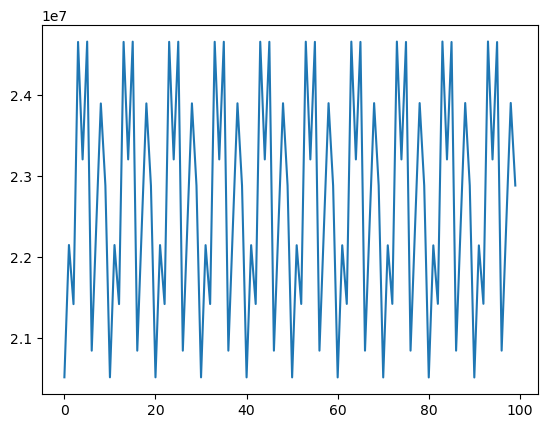

In [13]:
data_gps_c1c.code_observation_m.plot()

We can specify the columns to be used as x- or y- axis: `pd.DataFrame.plot(x="axis_1", y="axis_2")`

> ***Instruction:*** *Plot the code observation vs time.*

<Axes: xlabel='time_of_reception_in_receiver_time'>

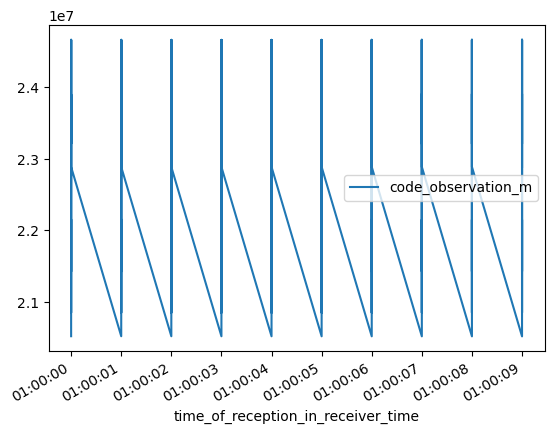

In [14]:
data_gps_c1c.plot(x="time_of_reception_in_receiver_time", y="code_observation_m")

We see that since the data from several satellites are all mixed up, we do not distinguish a clear pattern.  
To plot add several lines to the same plot, we not to specify that the plots are drawn on the same `matplotlib.pyplot.axes`. This can be specified using the `ax=` keyword when calling `DataFrame.plot()`

> ***Instruction:*** *Plot the GPS L1 C/A code observations vs time, with a different color for prn 1, 3 and 8.*

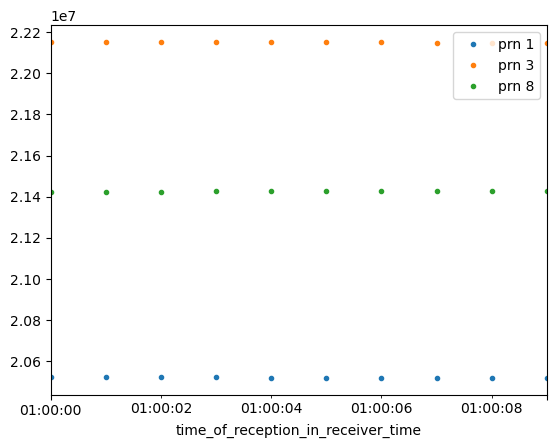

In [15]:
fix, ax = plt.subplots()

# data_gps_c1c.loc[data_gps_c1c.prn == 1].plot(x="time_of_reception_in_receiver_time", y="code_observation_m", ax=ax, label="prn 1")
# data_gps_c1c.loc[data_gps_c1c.prn == 3].plot(x="time_of_reception_in_receiver_time", y="code_observation_m", ax=ax, label="prn 3")
# data_gps_c1c.loc[data_gps_c1c.prn == 8].plot(x="time_of_reception_in_receiver_time", y="code_observation_m", ax=ax, label="prn 8")

for prn in [1, 3, 8]:
    data_gps_c1c.loc[data_gps_c1c.prn == prn].plot(
        x="time_of_reception_in_receiver_time",
        y="code_observation_m",
        ax=ax,
        label="prn " + str(prn),
        marker=".",
        linestyle="None",
    )

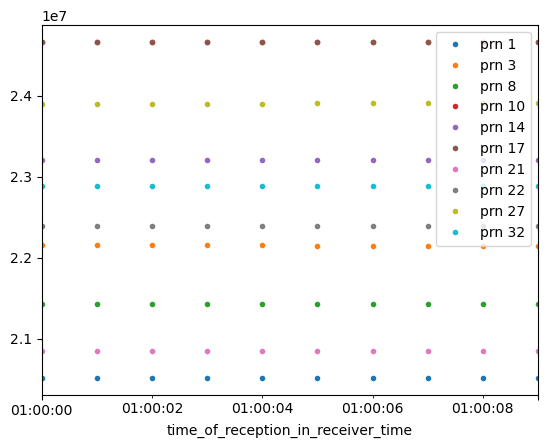

In [16]:
# plotting using groupby
fix, ax = plt.subplots()
for key, group in data_gps_c1c.groupby("prn"):
    group.plot(
        x="time_of_reception_in_receiver_time",
        y="code_observation_m",
        ax=ax,
        label="prn " + str(key),
        marker=".",
        ls="",
    );
    # print(f"Plotting data for prn {key}")

# Applying functions to whole `DataFrame`

When dealing with tabular data, it can be quite usual to apply a function to each row of the table. This can be done using the `.apply()` ([doc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)) method of a `DataFrame`.

Let use it to compute the orbital radius of the satellite for each row of the `DataFrame`.
- The orbital radius can be obtained by taking the norm of the satellite ECEF position. The norm of an array is computed using the function `numpy.linalg.norm(array)`
- The `norm` function has to be applied only to the column `data_gps_c1c.satellite_position_m`
- The apply method has to be applied to each row, so we have to define the keyword argument `axis=0` in the call to the `apply()` function.

So in the end, we'll have to use: `data_gps_c1c.satellite_position_m.apply(np.linalg.norm, axis=0)`

> ***Instruction:***
> - *Compute the orbital radius of each GPS satellite*
> - *add it as an additional column named `orbital_radius_m` to `data_gps_c1c`*
> - *plot the orbital radius vs time for each GPS satellite*

In [17]:
# Use .apply() to compute the norm of the satellite position for each row
data_gps_c1c.satellite_position_m.apply(np.linalg.norm, axis=0)

0     2.625714e+07
1     2.647883e+07
2     2.674538e+07
3     2.659093e+07
4     2.652427e+07
          ...     
95    2.687111e+07
96    2.711092e+07
97    2.681327e+07
98    2.681299e+07
99    2.672808e+07
Name: satellite_position_m, Length: 100, dtype: float64

In [18]:
# add this data as an additional column to data_gps_c1c
data_gps_c1c["orbital_radius_m"] = data_gps_c1c.satellite_position_m.apply(np.linalg.norm, axis=0)

# show the first 3 lines
data_gps_c1c.head(3)

,time_of_reception_in_receiver_time,constellation,prn,observation_code,code_observation_m,doppler_observation_hz,carrier_observation_m,lli,cn0_dbhz,satellite_position_m,satellite_velocity_mps,satellite_clock_bias_m,satellite_clock_bias_drift_mps,sagnac_effect_m,relativistic_clock_effect_m,group_delay_m,iono_delay_m,tropo_delay_m,approximate_antenna_position_m,orbital_radius_m
0,2023-01-01 01:00:00,G,1,1C,2.052051e+07,1305.738,2.052051e+07,NaN,50.3,"[13317371.58113945, -8117182.57994412, 2112336...","[280.77091103, 2741.87882332, 897.20083106]",69012.446230,-0.001500,9.524846,-2.900013,1.396017,1.714665,2.704830,"[4627852.352, 119640.5351, 4372994.4909]",2.625714e+07
1,2023-01-01 01:00:00,G,3,1C,2.215379e+07,2893.961,2.215377e+07,NaN,45.6,"[23042130.4322745, -11966216.08926064, 5195979...","[-417.59141045, 581.0663303, 3127.37259396]",-112204.650335,0.000341,14.140602,2.172151,0.558407,2.240729,3.737441,"[4627852.352, 119640.5351, 4372994.4909]",2.647883e+07
2,2023-01-01 01:00:00,G,8,1C,2.142369e+07,-2415.965,2.142368e+07,NaN,50.3,"[25176558.03930088, 5298246.7071228, 7306494.0...","[755.61807587, 582.71835085, -2968.8572581]",-30399.823608,-0.000545,-5.231426,-2.797335,1.535619,1.832541,2.921930,"[4627852.352, 119640.5351, 4372994.4909]",2.674538e+07


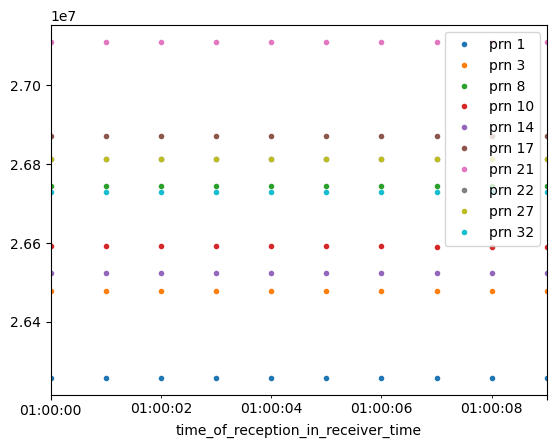

In [19]:
# plotting using groupby
fix, ax = plt.subplots()
for key, group in data_gps_c1c.groupby("prn"):
    group.plot(
        x="time_of_reception_in_receiver_time",
        y="orbital_radius_m",
        ax=ax,
        label="prn " + str(key),
        marker=".",
        ls="",
    )

Compute the mean orbital radius over time for all constellations (using `.groupby()`)
Plot it
Can you explain the differences ?

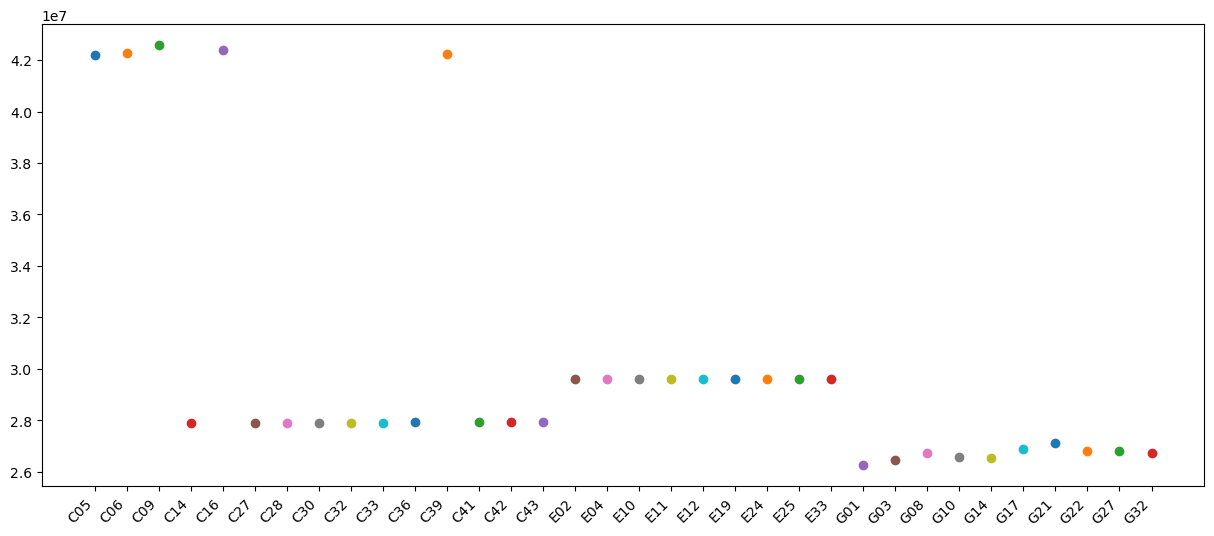

In [20]:
data_prx["orbital_radius_m"] = data_prx.satellite_position_m.apply(np.linalg.norm, axis=0)
data_prx.head()

fix, ax = plt.subplots(figsize=(15,6))
index=0
label=[]
for key, group in data_prx.groupby(["constellation","prn"]):
    if key[0] in ["G","C","E"]: # plot only GPS, Galileo and Beidou
        ax.plot(
            index,
            group.orbital_radius_m.mean(),
            marker="o",
        );
        index+=1
        label.append(key[0]+str(key[1]).zfill(2))
    # print(str(index)+"  "+key[0]+str(key[1]).zfill(2)+f"    {group.orbital_radius_m.mean()}")

ax.set_xticks(ticks=range(len(label)),labels=label, rotation=45, ha="right");

# Creating sub-groups in a `DataFrame`

The method `.groupby(condition)` creates a `pandas.api.typing.DataFrameGroupBy` object, which is basically the initial dataset split in different groups based on the `condition` criteria. You can then perform operations on the different groups.

The resulting object contains a dictionary `df.groupby(condition).groups` where:
- the keys are the different labels used to categorize the initial dataframe,
- the values are the index corresponding to each label.

In [21]:
# data_gps_c1c.groupby("prn").get_group(1)
data_gps_c1c.groupby("prn").groups
# data_gps_c1c.groupby("prn").groups.keys()
# data_gps_c1c.groupby("prn").groups.values()


{1: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], 3: [1, 11, 21, 31, 41, 51, 61, 71, 81, 91], 8: [2, 12, 22, 32, 42, 52, 62, 72, 82, 92], 10: [3, 13, 23, 33, 43, 53, 63, 73, 83, 93], 14: [4, 14, 24, 34, 44, 54, 64, 74, 84, 94], 17: [5, 15, 25, 35, 45, 55, 65, 75, 85, 95], 21: [6, 16, 26, 36, 46, 56, 66, 76, 86, 96], 22: [7, 17, 27, 37, 47, 57, 67, 77, 87, 97], 27: [8, 18, 28, 38, 48, 58, 68, 78, 88, 98], 32: [9, 19, 29, 39, 49, 59, 69, 79, 89, 99]}

plot the number of observations vs time

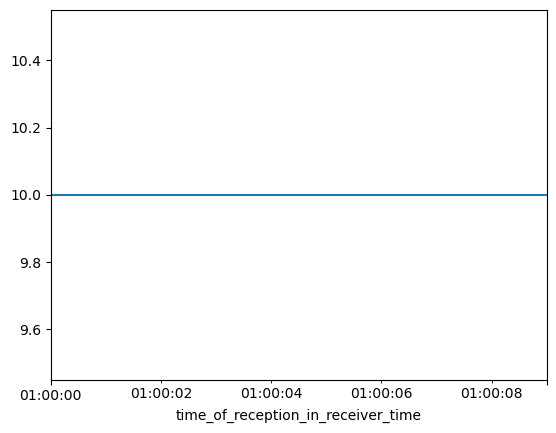

In [24]:
# number of observations at each epoch
data_gps_c1c.groupby("time_of_reception_in_receiver_time").groups
# can be used to determine the number of observations in time
# data_gps_c1c.groupby("time_of_reception_in_receiver_time").size()
data_gps_c1c.groupby("time_of_reception_in_receiver_time").size().plot();


Groupby using a logical condition

Select the satellites/epochs for the moving towards the Earth (doppler > 0) and away from the Earth (doppler < 0)

In [23]:

data_gps_c1c.groupby(data_gps_c1c.doppler_observation_hz > 0).groups

{False: [2, 3, 6, 8, 9, 12, 13, 16, 18, 19, 22, 23, 26, 28, 29, 32, 33, 36, 38, 39, 42, 43, 46, 48, 49, 52, 53, 56, 58, 59, 62, 63, 66, 68, 69, 72, 73, 76, 78, 79, 82, 83, 86, 88, 89, 92, 93, 96, 98, 99], True: [0, 1, 4, 5, 7, 10, 11, 14, 15, 17, 20, 21, 24, 25, 27, 30, 31, 34, 35, 37, 40, 41, 44, 45, 47, 50, 51, 54, 55, 57, 60, 61, 64, 65, 67, 70, 71, 74, 75, 77, 80, 81, 84, 85, 87, 90, 91, 94, 95, 97]}